## Моделирование процесса теплообмена в теплообменных аппаратах

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator, AutoMinorLocator
from matplotlib import cm

In [2]:
class Lab4(object):
    def __init__(self, g1, g2, c1, c2, d1, d2, f, start_series_first, start_series_second, iterations, revers=False):
        iterations += 1
        self._g1 = g1
        self._g2 = g2
        self._c1 = c1
        self._c2 = c2
        self._d1 = d1
        self._d2 = d2
        self._f = f
        self._iterations = iterations
        self._revers = revers
        
        self._prev_value = -100.0
        self._tolerance = 10e-3
        
        self._first_series = np.zeros(iterations, dtype="float")
        if not revers:
            self._first_series[0] = start_series_first
        else:
            self._first_series[-1] = start_series_first
        self._second_series = np.zeros(iterations,dtype="float")
        self._second_series[0] = start_series_second
        self._third_series = np.zeros(iterations, dtype="float")
    
    def _calculate_third_series_value(self, iteration):
        value = self._d1 * self._f * self._first_series[iteration]
        value += self._d2 * self._f * self._second_series[iteration]
        value /= (self._d1 * self._f + self._d2 * self._f)
        return value
    
    def _calculate_first_series_value(self, iteration):
        if  not self._revers:
            value = self._g1 * self._c1 * self._first_series[iteration-1]
            value -= self._d1 * self._f * self._first_series[iteration-1] / 2.0
        else:
            value = self._g1 * self._c1 * self._first_series[iteration+1]
            value -= self._d1 * self._f * self._first_series[iteration+1] / 2.0    
        value += self._d1 * self._f * self._third_series[iteration]
        value /= (self._g1 * self._c1 + self._d1 * self._f / 2.0)
        return value
    
    def _calculate_second_series_value(self, iteration):
        value = self._g2 * self._c2 * self._second_series[iteration-1]
        value += self._d2 * self._f * self._third_series[iteration]
        value -= self._d2 * self._f * self._second_series[iteration - 1] / 2.0
        value /= (self._g2 * self._c2 + self._d2 * self._f / 2.0)
        return value
    
    def main(self, iterations=10):
        while abs(self._prev_value - self._third_series[5]) > self._tolerance:
            self._prev_value = self._third_series[5]
            for i in range(1, self._iterations):
                self._second_series[i] = self._calculate_second_series_value(i)
            for i in range(0, self._iterations):
                self._third_series[i] = self._calculate_third_series_value(i)
            if not self._revers:
                for i in range(1, self._iterations):
                    self._first_series[i] = self._calculate_first_series_value(i)
            else:
                for i in range(0, self._iterations-1):
                    self._first_series[i] = self._calculate_first_series_value(i)      
        self.print_data()
        self.plot()
    
    def print_data(self):
        data = pd.DataFrame(list(zip(
            self._second_series, self._third_series, self._first_series
        )))
        data.columns = ["T2", "T3", "T1"]
        display(data)
        
    def plot(self):
        fig = plt.figure(dpi=200)
        ax = fig.add_subplot(111)
        ax.grid(which='major')
        ax.grid(which='minor')
        ax.grid(True)
        ax.plot(self._first_series, label="T1")
        ax.plot(self._second_series, label="T2")
        ax.plot(self._third_series, label="T3")
        leg = plt.legend(bbox_to_anchor=(0.795,1.01),\
        bbox_transform=plt.gcf().transFigure, ncol=3)
        leg_lines = leg.get_lines()
        leg_texts = leg.get_texts()
        plt.setp(leg_lines, linewidth=2)
        plt.show()

,T2,T3,T1
0,300.000000,155.000000,10.000000
1,279.767438,154.999996,30.232558
2,262.357999,154.999968,47.641964
3,247.377690,154.999849,62.622134
4,234.487387,154.999478,75.511996
5,223.395105,154.998531,86.603140
6,213.849303,154.996437,96.146391
7,205.633108,154.992271,104.357444
8,198.559324,154.984650,111.421705
9,192.466115,154.971628,117.498439


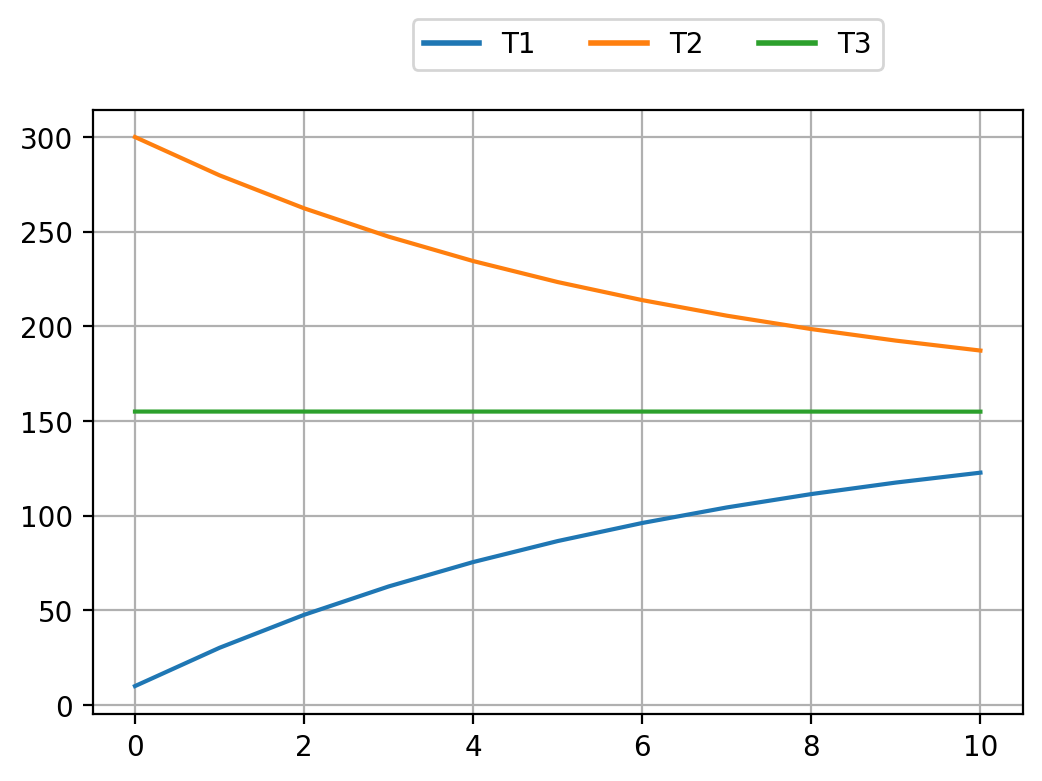

In [3]:
g1 = 1.0
g2 = 1.0
c1 = 5.0
c2 = 5.0
d1 = 15.0
d2 = 15.0
f = 0.05

t1_start = 10.0
t2_start = 300.0

iterations=10
lab4 = Lab4(g1, g2, c1, c2, d1, d2, f, t1_start, t2_start, iterations)
lab4.main()

,T2,T3,T1
0,300.000000,258.533445,217.076674
1,279.266723,237.807506,196.358629
2,258.536825,217.085507,175.644506
3,237.810639,196.367322,154.933793
4,217.088272,175.652650,134.225875
5,196.369630,154.941058,113.520078
6,175.654446,134.232017,92.815713
7,154.942320,113.524940,72.112107
8,134.232751,92.819221,51.408637
9,113.525179,72.114262,30.704754


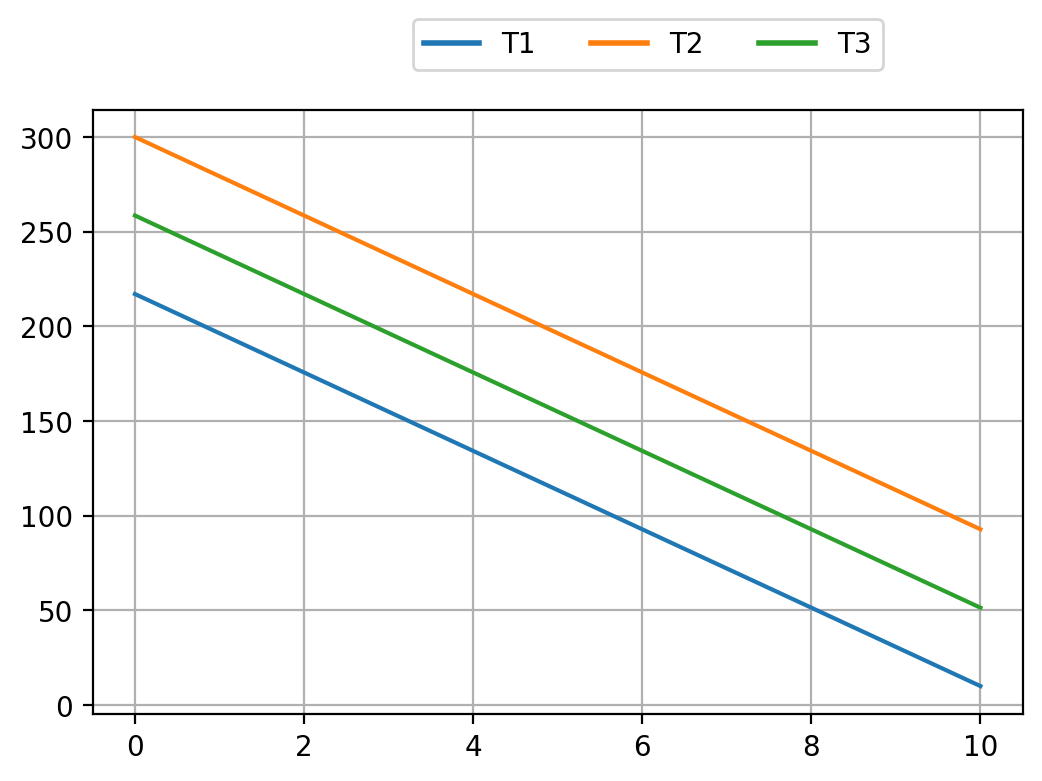

In [4]:
g1 = 0.5
g2 = 0.5
c1 = 5.0
c2 = 5.0
d1 = 20.0
d2 = 20.0
f = 0.05

t1_start = 10.0
t2_start = 300.0

iterations=10
lab4 = Lab4(g1, g2, c1, c2, d1, d2, f, t1_start, t2_start, iterations, revers=True)
lab4.main()